## Benaderingsformules voor de transformatie tussen RD- en WGS84-kaartcoördinaten

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
class RDWGSConverter:
    
    X0 = 155000
    Y0 = 463000
    phi0 = 52.15517440
    lam0 = 5.38720621

    def fromRdToWgs(self, coords):

        Kp = [0, 2, 0, 2, 0, 2, 1, 4, 2, 4, 1]
        Kq = [1, 0, 2, 1, 3, 2, 0, 0, 3, 1, 1]
        Kpq = [3235.65389, -32.58297, -0.24750, -0.84978, -0.06550, -0.01709, -0.00738, 0.00530, -0.00039, 0.00033, -0.00012]
        
        Lp = [1, 1, 1, 3, 1, 3, 0, 3, 1, 0, 2, 5]
        Lq = [0, 1, 2, 0, 3, 1, 1, 2, 4, 2, 0, 0]
        Lpq = [5260.52916, 105.94684, 2.45656, -0.81885, 0.05594, -0.05607, 0.01199, -0.00256, 0.00128, 0.00022, -0.00022, 0.00026]

        dX = 1E-5 * (coords[0] - self.X0)
        dY = 1E-5 * (coords[1] - self.Y0)

        phi = 0
        for k in range(len(Kpq)):
            phi += (Kpq[k] * dX ** Kp[k] * dY ** Kq[k])
        phi = self.phi0 + phi / 3600

        lam = 0
        for l in range(len(Lpq)):
            lam += (Lpq[l] * dX ** Lp[l] * dY ** Lq[l])
        lam = self.lam0 + lam / 3600

        return [phi, lam]

    def fromWgsToRd(self, coords):

        Rp = [0, 1, 2, 0, 1, 3, 1, 0, 2]
        Rq = [1, 1, 1, 3, 0, 1, 3, 2, 3]
        Rpq = [190094.945, -11832.228, -114.221, -32.391, -0.705, -2.340, -0.608, -0.008, 0.148]
        
        Sp = [1, 0, 2, 1, 3, 0, 2, 1, 0, 1]
        Sq = [0, 2, 0, 2, 0, 1, 2, 1, 4, 4]
        Spq = [309056.544, 3638.893, 73.077, -157.984, 59.788, 0.433, -6.439, -0.032, 0.092, -0.054]
        
        dPhi = 0.36 * (coords[0] - self.phi0)
        dLam = 0.36 * (coords[1] - self.lam0)
        
        X = 0
        for r in range(len(Rpq)):
            X += (Rpq[r] * dPhi ** Rp[r] * dLam ** Rq[r])
        X = self.X0 + X
        
        Y = 0
        for s in range(len(Spq)):
            Y += (Spq[s] * dPhi ** Sp[s] * dLam ** Sq[s])
        Y = self.Y0 + Y
        
        return [X, Y]

In [3]:
# Converter
converter = RDWGSConverter()

In [4]:
# RD coördinaten Onze Lieve Vrouwetoren
rd_x, rd_y = 155000, 463000

In [5]:
# Conversion
converter.fromRdToWgs([rd_x, rd_y]) # van RD naar WGS84

[52.1551744, 5.38720621]

In [6]:
# WSG coördinaten Onze Lieve Vrouwetoren
wsg_x, wsg_y = 52.15517440, 5.38720621

In [7]:
# Conversion
converter.fromWgsToRd([wsg_x, wsg_y]) # van WGS84 naar RD

[155000.0, 463000.0]

In [8]:
# Assertion
assert converter.fromRdToWgs([rd_x, rd_y]) == [wsg_x, wsg_y]
assert converter.fromWgsToRd([wsg_x, wsg_y]) == [rd_x, rd_y]

## Bijlage: rekenvoorbeeld 2

In [9]:
# Amsterdam
Westertoren = [120700.723, 487525.501]

WGS84 = converter.fromRdToWgs(Westertoren)
print(WGS84)

RD = converter.fromWgsToRd(WGS84)
print(RD)

[52.3745325270113, 4.883525591447692]
[120700.72277620077, 487525.50125851255]


In [10]:
# Groningen
Martinitoren = [233883.131, 582065.167]

WGS84 = converter.fromRdToWgs(Martinitoren)
print(WGS84)

RD = converter.fromWgsToRd(WGS84)
print(RD)

[53.21938316697859, 6.568200529078002]
[233883.13122535235, 582065.167604752]


## Bijlage: Plot RD-coördinaten

In [11]:
# Packages
import matplotlib.pyplot as plt
import geopandas as gpd

In [12]:
# RD coördinaten
coords_RD = dict()
coords_RD['Martinitoren'] = [233883.131, 582065.167]
coords_RD['Onze Lieve Vrouwetoren'] = [155000, 463000]
coords_RD['Westertoren'] = [120700.723, 487525.501]

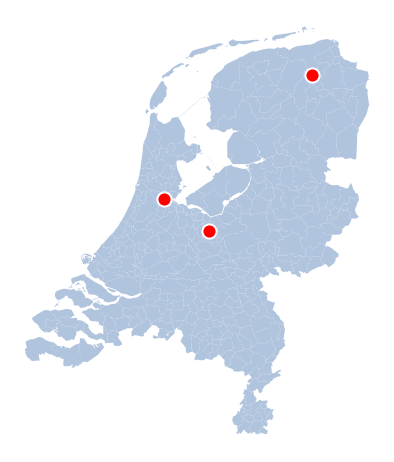

In [13]:
# RD coördinaten op de kaart
gemeenten = gpd.read_file('../Shapefile/gemeentegrenzen.gpkg')

gemeenten.plot(figsize=(7, 8.25), facecolor='lightsteelblue').axis('off')
for coords in coords_RD.values():
    plt.scatter(coords[0], coords[1], s=200, color='red', edgecolor='white', linewidth=2)
plt.show()

## Bijlage: Plot WGS-coördinaten

In [14]:
# Packages
import folium

In [15]:
# WGS coördinaten
coords_WGS = {key:converter.fromRdToWgs(value) for (key, value) in coords_RD.items()}
coords_WGS

{'Martinitoren': [53.21938316697859, 6.568200529078002],
 'Onze Lieve Vrouwetoren': [52.1551744, 5.38720621],
 'Westertoren': [52.3745325270113, 4.883525591447692]}

In [16]:
# RD coördinaten op de kaart
m = folium.Map(location = [52.15, 5.38], zoom_start = 7)
for key, value in coords_WGS.items():
    folium.Marker(location=value, popup=key).add_to(m)
display(m)